In [1]:
%store -r stage1_bogota0_high_similarity
%store -r stage1_bogota1_high_similarity
%store -r stage1_bogota2_high_similarity
%store -r stage1_bogota3_high_similarity

%store -r stage2_bogota0_high_similarity
%store -r stage2_bogota1_high_similarity
%store -r stage2_bogota2_high_similarity
%store -r stage2_bogota3_high_similarity

%store -r stage3_bogota0_high_similarity
%store -r stage3_bogota1_high_similarity
%store -r stage3_bogota2_high_similarity
%store -r stage3_bogota3_high_similarity

%store -r stage4_bogota0_high_similarity
%store -r stage4_bogota1_high_similarity
%store -r stage4_bogota2_high_similarity
%store -r stage4_bogota3_high_similarity

## Stage 1 Bogota 3

In [2]:
# make unique, sorted, common index
stage1_bogota3_high_similarity['dissimilarity'] = 1 - stage1_bogota3_high_similarity['similarity']
stage1_bogota3_high_similarity = stage1_bogota3_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota3_high_similarity['user1']).union(stage2_bogota3_high_similarity['user2']))

# reshape
df = (stage1_bogota3_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b3 = df
df_stage1_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
Chranium,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,1.314286,0.000000,0.000000,0.000000,0.0
Danielsv9207,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
DavidQP,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
DianaNavarrete,0.000000,0.666667,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
JhonEmmanuelTorres,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
NicolasPrr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.739130,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
adriel62,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.444444,0.000000,0.0
afceballosr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0


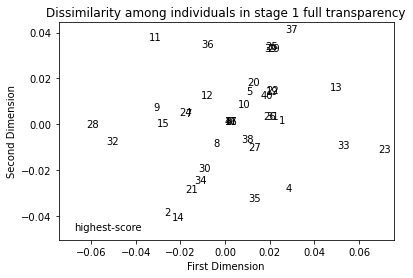

In [3]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b3)  
mds_coords = mds_model.fit_transform(df_stage1_b3) 
                                                                                                                                  
#food_names = df_stage1_b3.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 full transparency')    
plt.show()

## Stage 2 Bogota 3

In [4]:
# make unique, sorted, common index
stage2_bogota3_high_similarity['dissimilarity'] = 1 - stage2_bogota3_high_similarity['similarity']
stage2_bogota3_high_similarity = stage2_bogota3_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota3_high_similarity['user1']).union(stage2_bogota3_high_similarity['user2']))

# reshape
df = (stage2_bogota3_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_new = df
df_new

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Chranium,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.000000,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.0
Danielsv9207,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DavidQP,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DianaNavarrete,0.000000,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
JhonEmmanuelTorres,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
NicolasPrr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.772727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
adriel62,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
afceballosr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


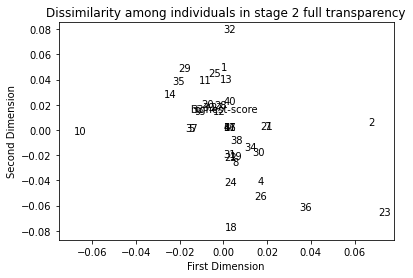

In [5]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_new)  
mds_coords = mds_model.fit_transform(df_new) 
                                                                                                                                  
food_names = stage2_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'highest-score', 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 2 full transparency')    
plt.show()

## Stage 3 Bogota 3

In [6]:
# make unique, sorted, common index
stage3_bogota3_high_similarity['dissimilarity'] = 1 - stage3_bogota3_high_similarity['similarity']
stage3_bogota3_high_similarity = stage3_bogota3_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota3_high_similarity['user1']).union(stage3_bogota3_high_similarity['user2']))

# reshape
df = (stage3_bogota3_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b3 = df
df_stage3_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chranium,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.000000,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Danielsv9207,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DavidQP,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.332174,0.000000,0.000000,0.000000
DianaNavarrete,0.000000,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JhonEmmanuelTorres,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NicolasPrr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
adriel62,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
afceballosr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


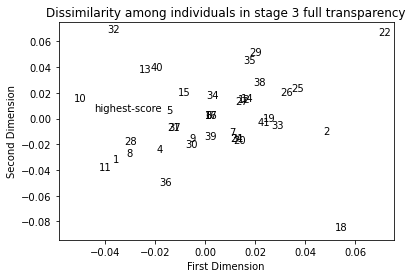

In [7]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b3)  
mds_coords = mds_model.fit_transform(df_stage3_b3) 
                                                                                                                                  
food_names = stage3_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'highest-score', 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension') 
plt.title('Dissimilarity among individuals in stage 3 full transparency')  
plt.show()

## Stage 4 Bogota 3

In [8]:
# make unique, sorted, common index
stage4_bogota3_high_similarity['dissimilarity'] = 1 - stage4_bogota3_high_similarity['similarity']
stage4_bogota3_high_similarity = stage4_bogota3_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota3_high_similarity['user1']).union(stage4_bogota3_high_similarity['user2']))

# reshape
df = (stage4_bogota3_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b3 = df
df_stage4_b3

user2,AFelipeGA,Chranium,Danielsv9207,DavidQP,DianaNavarrete,JhonEmmanuelTorres,NicolasPrr,adriel62,afceballosr,afforeroc,...,nfmorenog,oacastillol,ofnanezn,ronaldsg20,sarizag,smarquezo,spenas,srmedinac,wapiravaguens,wilson911013
user1,,,,,,,,,,,,,,,,,,,,,
AFelipeGA,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Chranium,0.000000,0.000000,0.0,0.000000,1.333333,0.0,0.000000,0.000000,0.000000,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Danielsv9207,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
DavidQP,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426032,0.000000,0.000000,0.000000
DianaNavarrete,0.000000,1.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
JhonEmmanuelTorres,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
NicolasPrr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
adriel62,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
afceballosr,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


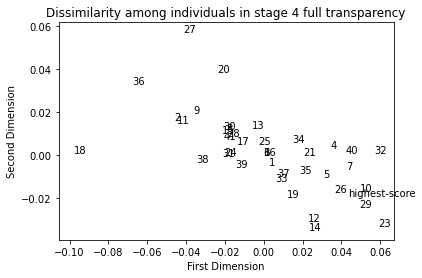

In [9]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b3)  
mds_coords = mds_model.fit_transform(df_stage4_b3) 
                                                                                                                                  
food_names = stage4_bogota3_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 'highest-score', 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension') 
plt.title('Dissimilarity among individuals in stage 4 full transparency')  
plt.show()

## Stage 4 Bogota 0

In [10]:
# make unique, sorted, common index 
stage4_bogota0_high_similarity['dissimilarity'] = 1-stage4_bogota0_high_similarity['similarity']
stage4_bogota0_high_similarity = stage4_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota0_high_similarity['user1']).union(stage4_bogota0_high_similarity['user2']))

# reshape
df = (stage4_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b0 = df
df_stage4_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.937500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
CristianLozano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
DglyP,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.962828,0.000000,0.000000,0.000000,0.267582,0.0,0.000000,0.000000,0.000000,0.0
JoseMolano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.591837,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.694915,0.000000,0.0
Judgarciani,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.876847,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MogGy94,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Moimolcp,0.0000,0.00,0.000000,0.000000,0.876847,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
NicolasZon,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.769231,0.000000,0.0,0.000000,0.000000,0.000000,0.0
UNhcrodriguezl,0.0000,0.00,0.000000,0.591837,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.739437,0.000000,0.000000,0.0


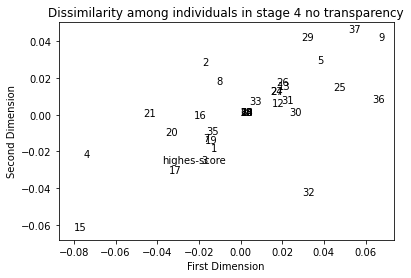

In [11]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b0)  
mds_coords = mds_model.fit_transform(df_stage4_b0) 
                                                                                                                                  
food_names = stage4_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'highes-score', 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 4 no transparency')    
plt.show()

## Stage 3 Bogota 0

In [12]:
# make unique, sorted, common index 
stage3_bogota0_high_similarity['dissimilarity'] = 1-stage3_bogota0_high_similarity['similarity']
stage3_bogota0_high_similarity = stage3_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota0_high_similarity['user1']).union(stage3_bogota0_high_similarity['user2']))

# reshape
df = (stage3_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b0 = df
df_stage3_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.937500,0.000000,0.0,0.000000,0.000000,0.000000,0.0
CristianLozano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,1.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
DglyP,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.214585,0.0,0.000000,0.000000,0.000000,0.0
JoseMolano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.591837,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.039916,0.000000,0.000000,0.0
Judgarciani,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.873016,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.985768,0.0,0.000000,0.000000,0.867725,0.0
MogGy94,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Moimolcp,0.0000,0.00,0.000000,0.000000,0.873016,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
NicolasZon,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.769231,0.000000,0.0,0.000000,0.000000,0.000000,0.0
UNhcrodriguezl,0.0000,0.00,0.000000,0.591837,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


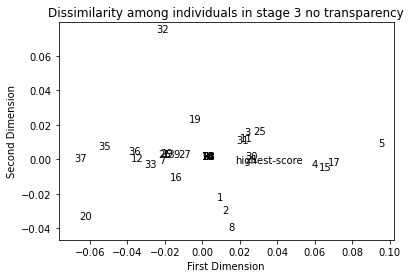

In [13]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b0)  
mds_coords = mds_model.fit_transform(df_stage3_b0) 
                                                                                                                                  
food_names = stage3_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'highest-score', 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 3 no transparency')    
plt.show()

## Stage 2 Bogota 0

In [14]:
# make unique, sorted, common index 
stage2_bogota0_high_similarity['dissimilarity'] = 1-stage2_bogota0_high_similarity['similarity']
stage2_bogota0_high_similarity = stage2_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota0_high_similarity['user1']).union(stage2_bogota0_high_similarity['user2']))

# reshape
df = (stage2_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage2_b0 = df
df_stage2_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.937500,0.000000,0.0,0.000000,0.000000,0.000000,0.0
CristianLozano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,1.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
DglyP,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
JoseMolano,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.583333,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.763228,0.000000,0.000000,0.0
Judgarciani,0.0000,0.00,0.000000,0.000000,0.000000,0.0,1.706656,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MogGy94,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Moimolcp,0.0000,0.00,0.000000,0.000000,1.706656,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
NicolasZon,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.769231,0.000000,0.0,0.000000,0.000000,0.000000,0.0
UNhcrodriguezl,0.0000,0.00,0.000000,0.583333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


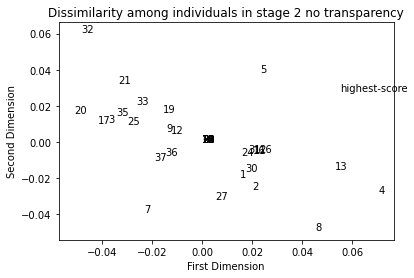

In [15]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage2_b0)  
mds_coords = mds_model.fit_transform(df_stage2_b0) 
                                                                                                                                  
food_names = stage2_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'highest-score', 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 2 no transparency')    
plt.show()

## Stage 1 Bogota 0

In [16]:
# make unique, sorted, common index 
stage1_bogota0_high_similarity['dissimilarity'] = 1-stage1_bogota0_high_similarity['similarity']
stage1_bogota0_high_similarity = stage1_bogota0_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota0_high_similarity['user1']).union(stage1_bogota0_high_similarity['user2']))

# reshape
df = (stage1_bogota0_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b0 = df
df_stage1_b0

user2,CamiloRueda,CristianLozano,DglyP,JoseMolano,Judgarciani,MogGy94,Moimolcp,NicolasZon,UNhcrodriguezl,annipi,...,katherinsb,leavendanoro,lfvalderrama,maikellPardoA,mnguzmanc,odprietoh,pcberriop,pipemax85,sacastroc,yocuervoc
user1,,,,,,,,,,,,,,,,,,,,,
CamiloRueda,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
CristianLozano,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
DglyP,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
JoseMolano,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.358491,0.000000,0.00000,0.0
Judgarciani,0.00000,0.000000,0.0,0.000000,0.000000,0.0,1.481313,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
MogGy94,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
Moimolcp,0.00000,0.000000,0.0,0.000000,1.481313,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
NicolasZon,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00000,0.0
UNhcrodriguezl,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.560976,0.000000,0.00000,0.0


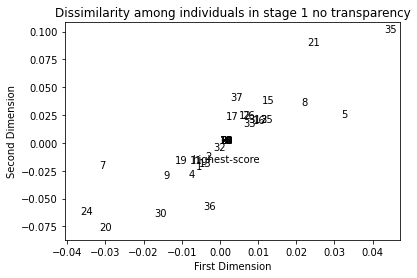

In [17]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b0)  
mds_coords = mds_model.fit_transform(df_stage1_b0) 
                                                                                                                                  
food_names = stage1_bogota0_high_similarity['user2'].to_list()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 'highest-score', 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 no transparency')    
plt.show()

## Stage 1 Bogota 2

In [18]:
# make unique, sorted, common index 
stage1_bogota2_high_similarity['dissimilarity'] = 1-stage1_bogota2_high_similarity['similarity']
stage1_bogota2_high_similarity = stage1_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage1_bogota2_high_similarity['user1']).union(stage1_bogota2_high_similarity['user2']))

# reshape
df = (stage1_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage1_b2 = df
df_stage1_b2

user2,Gantiva,HashNick,JuanitoAli,JulianaNino,Yelis3,begarzonf,ccvacad,crarojasca,davidrh195,debeltranc,...,kancas,kmendezp96,ligibrial,lsfinite,luegilca,mdbelloc,oserasoa,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
Gantiva,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.695652
HashNick,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.64678,0.000000,0.0,0.000000,0.000000
JuanitoAli,0.000000,0.00000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
JulianaNino,0.000000,0.00000,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
Yelis3,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.974199,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
begarzonf,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.948164,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
ccvacad,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
crarojasca,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
davidrh195,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000


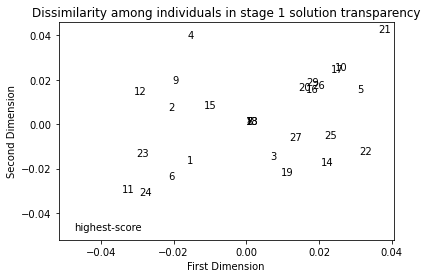

In [19]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage1_b2)  
mds_coords = mds_model.fit_transform(df_stage1_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 'highest-score', 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 1 solution transparency')    
plt.show()

## Stage 2 Bogota 2

In [20]:
# make unique, sorted, common index 
stage2_bogota2_high_similarity['dissimilarity'] = 1-stage2_bogota2_high_similarity['similarity']
stage2_bogota2_high_similarity = stage2_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage2_bogota2_high_similarity['user1']).union(stage2_bogota2_high_similarity['user2']))

# reshape
df = (stage2_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage2_b2 = df
df_stage2_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Dandarprox,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.764045,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Davsatu313,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059,0.000000,0.000000,0.000000,0.00000
Gantiva,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
HashNick,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.430233,0.000000,0.687500,0.585714,0.000000,0.000000,0.000000,0.00000
JuanitoAli,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.059877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
JulianaNino,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Phoenixest,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Yelis3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,1.925809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


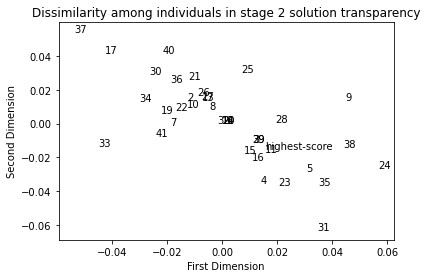

In [21]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage2_b2)  
mds_coords = mds_model.fit_transform(df_stage2_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 2 solution transparency')    
plt.show()

## Stage 3 Bogota 2

In [22]:
# make unique, sorted, common index 
stage3_bogota2_high_similarity['dissimilarity'] = 1-stage3_bogota2_high_similarity['similarity']
stage3_bogota2_high_similarity = stage3_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage3_bogota2_high_similarity['user1']).union(stage3_bogota2_high_similarity['user2']))

# reshape
df = (stage3_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage3_b2 = df
df_stage3_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dandarprox,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Davsatu313,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gantiva,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.817073,0.000000,0.000000,0.000000,0.000000
HashNick,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.449438,0.00000,0.646780,0.585714,0.000000,0.000000,0.000000,0.000000
JuanitoAli,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.057765,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JulianaNino,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Phoenixest,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yelis3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,1.924546,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


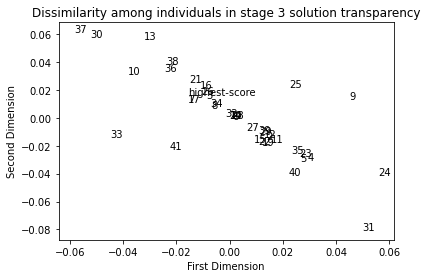

In [23]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage3_b2)  
mds_coords = mds_model.fit_transform(df_stage3_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 3 solution transparency')    
plt.show()

## Stage 4 Bogota 2

In [24]:
# make unique, sorted, common index 
stage4_bogota2_high_similarity['dissimilarity'] = 1-stage4_bogota2_high_similarity['similarity']
stage4_bogota2_high_similarity = stage4_bogota2_high_similarity.drop(['similarity'], axis=1)
idx = sorted(set(stage4_bogota2_high_similarity['user1']).union(stage4_bogota2_high_similarity['user2']))

# reshape
df = (stage4_bogota2_high_similarity.pivot(index='user1', columns='user2', values='dissimilarity')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )

df_stage4_b2 = df
df_stage4_b2

user2,CSebasGomez,Dandarprox,Davsatu313,Gantiva,HashNick,JuanitoAli,JulianaNino,Phoenixest,Yelis3,bdvegat,...,ligibrial,lsfinite,luealfonsoru,luegilca,mdbelloc,oserasoa,raulramirezp,sagilm,xdanielsb,ykchautai
user1,,,,,,,,,,,,,,,,,,,,,
CSebasGomez,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dandarprox,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Davsatu313,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gantiva,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.817073,0.000000,0.000000,0.000000,0.000000
HashNick,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.417582,0.000000,0.606061,0.604938,0.000000,0.000000,0.000000,0.000000
JuanitoAli,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932055,0.000000,...,0.913503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JulianaNino,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Phoenixest,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yelis3,0.0,0.000000,0.000000,0.000000,0.000000,0.932055,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.961797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


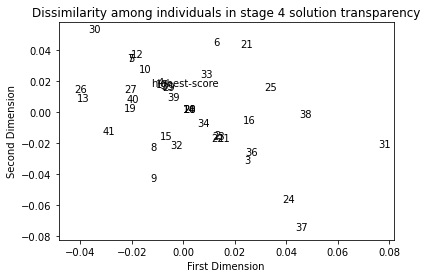

In [26]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(df_stage4_b2)  
mds_coords = mds_model.fit_transform(df_stage4_b2) 
                                                                                                                                  
#food_names = df_stage1_b2.columns.tolist()
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'highest-score', 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among individuals in stage 4 solution transparency')    
plt.show()